In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from matplotlib import pyplot as plt
import folium

In [3]:
speeches_df = pd.read_csv("../TextVisualization/Data/Processed/preprocessed_speech.csv", index_col=0)
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

/var/folders/ny/x98qxh1124dbtz5g3f6s09hh0000gn/T/ipykernel_84631/727706422.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [4]:
happiness = pd.merge(speeches_df, countries, left_on="country", right_on="iso_a3")
happiness["GDP per Capita"] = np.exp(happiness["Log GDP per capita"])
happiness = GeoDataFrame(happiness, geometry=happiness["geometry"])
happiness_point = happiness.copy()
happiness_point["geometry"] = happiness_point["geometry"].centroid
happiness_point = happiness_point.sort_values("year", ascending=True)
longitude, latitude = (
    happiness_point["geometry"].x,
    happiness_point["geometry"].y,
)
happiness_point["longitude"] = longitude
happiness_point["latitude"] = latitude

/var/folders/ny/x98qxh1124dbtz5g3f6s09hh0000gn/T/ipykernel_84631/2266196883.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  happiness_point["geometry"] = happiness_point["geometry"].centroid


<Axes: >

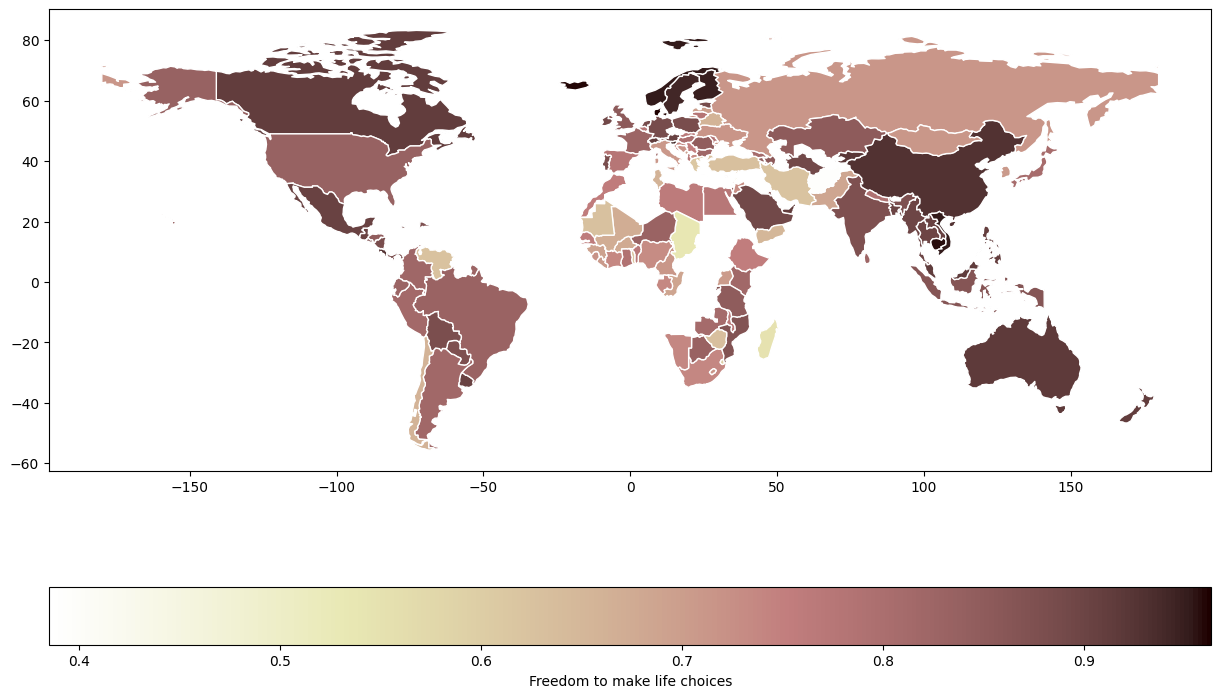

In [7]:
# choropleth
happiness.query("year ==2019").plot(
    column="Freedom to make life choices",
    figsize=(15, 10),
    legend=True,
    edgecolor="white",
    cmap="pink_r",
    legend_kwds={"label": "Freedom to make life choices", "orientation": "horizontal"},
)

In [8]:
fig_world_map = px.choropleth(
    happiness.query("year == 2019").dropna(subset=["Freedom to make life choices"]),
    locations="ISO-alpha3 Code",
    color="Freedom to make life choices",
    hover_name="Country or Area",
    color_continuous_scale=px.colors.sequential.Brwnyl,
)
fig_world_map